### Chapter 9 - Parametric Inference Exercise 2
Let $X_1,...,X_n \sim U(a,b)$ where $a$ and $b$ are unknown parameters with $a<b$. Let $\tau = \int x dF(x)$. Let $\hat\tau$ be the MLE estimator and $\tilde\tau$ be the non-parametric plug-in estimator. Analyze their respective sampling distribution and estimated standard error.

#### Notes
This notebook does not directly address exercise 2. It instead serves as an extension to make a closer look at the behavior of the estimators for $\tau$. (i.e $\hat\tau$ and $\tilde\tau$)

By Monte Carlo simulation, we would look at:
1. Their sampling distributions and 
2. Estimated standard variance.

In [16]:
# true a = 1, true b = 3 (i.e U(1,3) be the true model)
a <- 1
b <- 3
# sample size = 100
n <- 100

#### 1. MLE Estimator $\hat\tau$

Note that $\tau = \int x dF(x)$ is the expectation of $X$, $\mathop{\mathbb{E}}(X) = (a+b)/2.$ Therefore, $\tau$ is a function of $a$ and $b$. 

By plug-in method, the MLE estimator of $\tau$ is:

$$\hat\tau = g(\hat a, \hat b) = (\hat a + \hat b)/2$$

where $\hat a, \hat b$ are the MLE estimator of $a, b$:<br><br>

<center>$\hat a = X_{(1)}$, where $X_{(1)}$ is first order statistics of $X$.</center><br>


<center>$\hat b = X_{(n)}$, where $X_{(n)}$ is last order statistics of $X$.</center>

In [25]:
B <- 10000
mle.tau <- numeric(B)
for (i in 1:B) {
    x <- runif(n, min = a, max = b)
    mle.a <- min(x)
    mle.b <- max(x)
    mle.tau[i] <- (mle.a + mle.b)/2
}

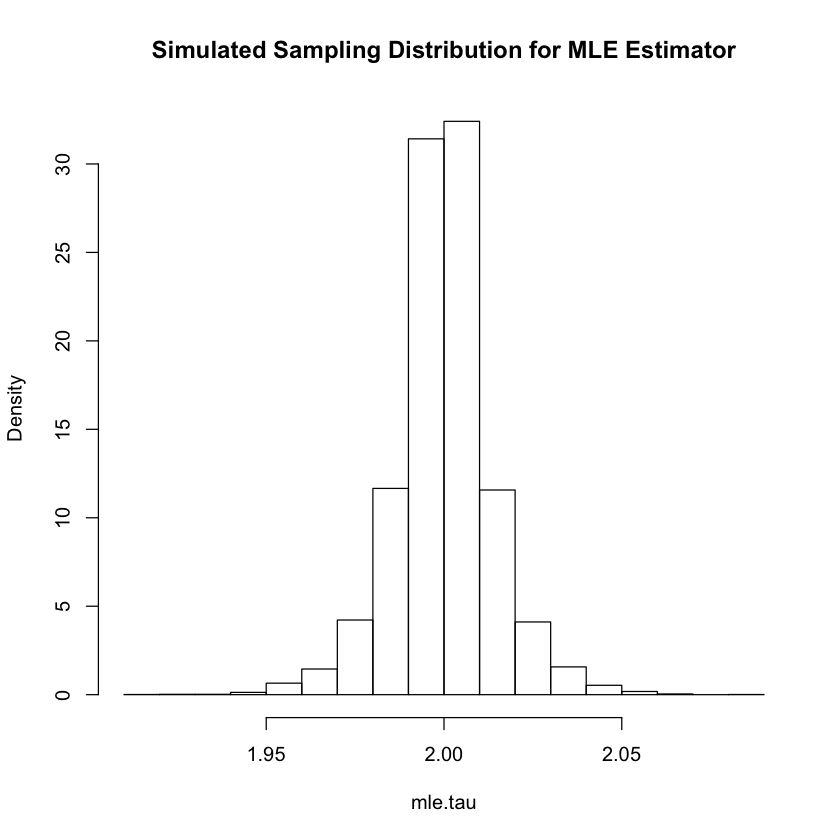

In [26]:
hist(mle.tau, main = "Simulated Sampling Distribution for MLE Estimator", freq = FALSE)

* The distribution resembles a bell shape with a sharp peak. It indicates the estimator has less standard error
* The peak of the sampling distribution is centered at 2. It indicates the consistency of the MLE estimator. (It can be analytically shown that the estimator is also unbiased!)

In [32]:
mle.se <- sqrt(var(mle.tau))
print(paste0("The estimated standard error for MLE estimator = ", round(mle.se, 3)))

[1] "The estimated standard error for MLE estimator = 0.014"


#### 2. Nonparametric Plug-in Estimator $\tilde\tau$

As a note, nonparametric plug-in estimation means replacing the true model $F(x)$ by the nonparametric plug-in estimator $\hat F_n(X)$, where $\hat F_n(X) = \sum_{i=1}^{n} I\{X_i \le x\}/n$. It puts equal weight $1/n$ on each data points $X_i, i=1,...,n.$

Therefore, $\tilde\tau$ is actually a simple average $\bar X_n$ after simplification.

In [28]:
B <- 10000
nonpara.tau <- numeric(B)
for (i in 1:B) {
    x <- runif(n, min = a, max = b)
    nonpara.tau[i] <- mean(x)
}

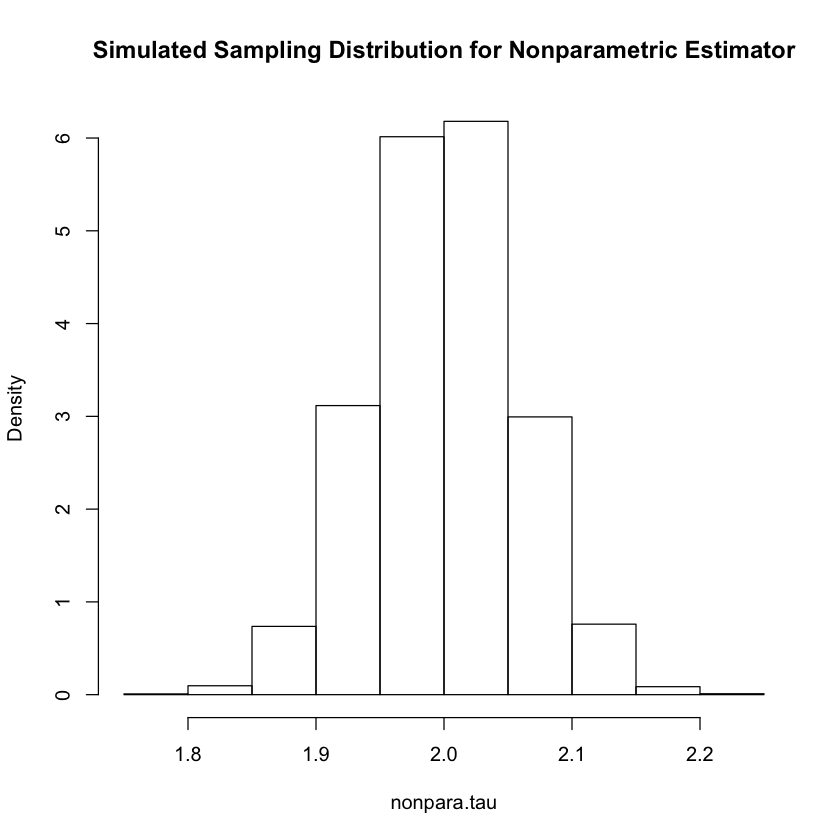

In [29]:
hist(nonpara.tau, main = "Simulated Sampling Distribution for Nonparametric Estimator", freq = FALSE)

* The sampling distribution resembles a bell shape with a fairly wide dispersion. It indicates a relatively large standard error.
* The peak is also centered at 2. It indicates the consistency of the nonparametric estimator. (It can be analytically shown that the estimator is unbiased!)

In [34]:
nonpara.se <- sqrt(var(nonpara.tau))
print(paste0("The estimated standard error for nonparametric plug-in estimator = ", round(nonpara.se, 3)))

[1] "The estimated standard error for nonparametric plug-in estimator = 0.058"


#### 3. Comparison

Let's combine the two result together to make an easy comparison!

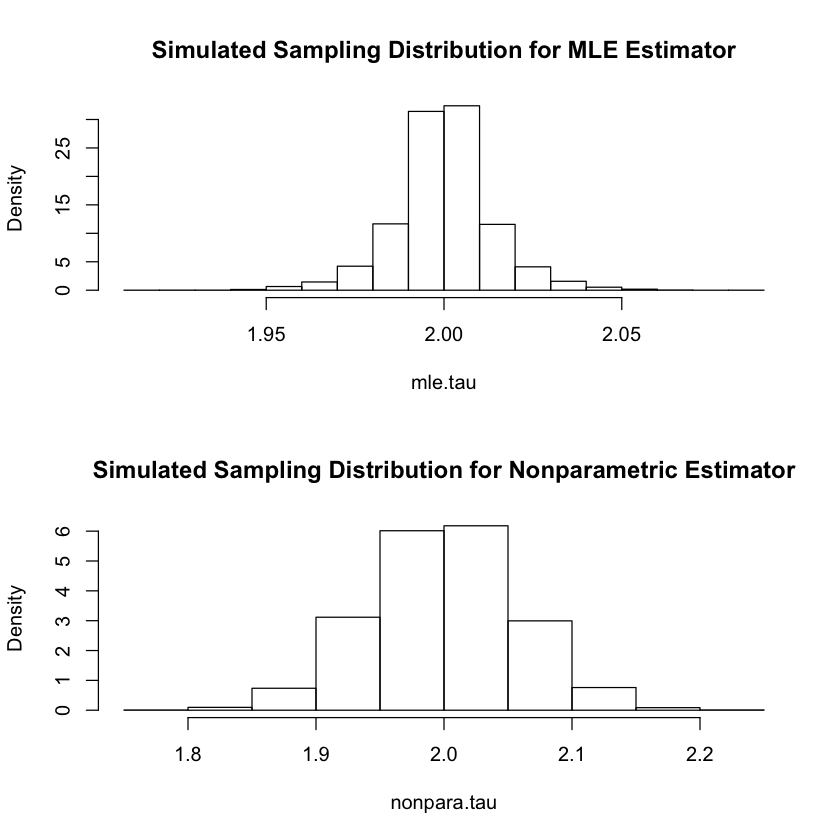

In [35]:
par(mfrow=c(2,1))
hist(mle.tau, main = "Simulated Sampling Distribution for MLE Estimator", freq = FALSE)
hist(nonpara.tau, main = "Simulated Sampling Distribution for Nonparametric Estimator", freq = FALSE)

* Both estimators are consistent with bell-shape sampling distribution.
* MLE estimator has less standard error than the nonparametric estimator

How much standard error is reduced for MLE estimator in comparison with nonparametric estimator? Let's see:

In [38]:
print(paste0("Standard error of MLE estimator is ", 100 * round(mle.se / nonpara.se, 3), "% of the nonparametric estimator."))

[1] "Standard error of MLE estimator is 23.5% of the nonparametric estimator."


#### Conclusion

Though both estimators are consistent, which is nice-enough property for estimators, it turns out that, in terms of standard error, MLE estimator is way more efficient than the nonparametric estimator! 

Due to the asymptotic behavior of both estimator, the efficiency of MLE estimator (compared with the nonparametric one) may multiply with increasing sample size.

#### Extension
1. Analytically find the standard error for $\hat\tau$ and $\tilde\tau$.